<a href="https://colab.research.google.com/github/cyk0810/nvidia/blob/20250529/yolov8_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
 # YOLOv8 설치
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 842.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [4]:
# 필요한 라이브러리 임포트
import os
from ultralytics import YOLO
import shutil
from google.colab import drive
from google.colab import files


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
# 파일 선택기를 통한 업로드
uploaded = files.upload()

Saving Test.v2i.yolov8.zip to Test.v2i.yolov8.zip


In [7]:
!mkdir -p /content/dataset

# 압축 해제
!unzip -q /content/Test.v2i.yolov8.zip -d /content/dataset

replace /content/dataset/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
# 대상 디렉토리 생성
!mkdir -p /content/dataset/test/images

# 모든 파일 복사
!cp /content/dataset/train/images/* /content/dataset/test/images/

In [10]:
# 대상 디렉토리 생성
!mkdir -p /content/dataset/valid/images

# 모든 파일 복사
!cp /content/dataset/train/images/* /content/dataset/valid/images/

In [17]:
!mkdir -p /content/dataset/valid/labels

# 모든 파일 복사
!cp /content/dataset/train/images/* /content/dataset/valid/labels/

# data.yaml 파일수정
train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images


In [30]:
from ultralytics import YOLO
# Try a smaller model like yolov8s-seg.pt or yolov8m-seg.pt
# We will try yolov8m-seg.pt as a balance between size and performance
model = YOLO('yolov8l-seg.pt')

# Continue with the training parameters, you might need to adjust batch size further
# or reduce imgsz if memory errors persist even with a smaller model.
results = model.train(
    data='/content/dataset/data.yaml',  # 데이터셋 설정 파일
    epochs=50,               # 학습 에폭 수
    imgsz=640,               # 이미지 크기 (consider reducing if still out of memory)
    batch=8,                # 배치 크기 (consider reducing further if still out of memory)
    name='yolov8_seg_custom',    # 프로젝트 이름
    project='/content/runs/train',    # 저장 경로
    patience=0,             # Early stopping patience
    save=True,               # 체크포인트 저장
    device=0                 # GPU 사용
)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_seg_custom7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=0, perspective=0.0, plots=True, pose=12.0, p

train: Scanning /content/dataset/train/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 421.7±246.1 MB/s, size: 21.7 KB)


val: Scanning /content/dataset/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]


Plotting labels to /content/runs/train/yolov8_seg_custom7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/train/yolov8_seg_custom7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.55G      1.641      4.419      3.654      1.596         70        640: 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         15         97        0.8    0.00813     0.0362     0.0217      0.547     0.0109     0.0224     0.0158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.96G      1.776      4.947      3.689       1.74         73        640: 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         15         97        0.8    0.00787     0.0346      0.021      0.545     0.0106     0.0221     0.0153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.96G      1.755      4.331       3.72      1.748         76        640: 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         15         97        0.8     0.0079     0.0354     0.0209      0.545     0.0107     0.0242     0.0164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.96G      1.691      4.283      3.694      1.646         92        640: 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         15         97        0.8    0.00775     0.0345     0.0213      0.555     0.0138     0.0242      0.016



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.96G       1.89      5.011      3.617      1.855         69        640: 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         15         97      0.388      0.243       0.29      0.143      0.362      0.265      0.231      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.96G      1.261      3.028      2.779      1.371         90        640: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         15         97      0.561      0.596       0.65      0.346      0.414      0.513      0.414      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.96G      1.196      2.606      2.094      1.326         97        640: 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         15         97       0.64       0.62      0.722      0.434      0.448      0.409      0.495      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.01G      1.064      2.149      2.151      1.227         95        640: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         15         97      0.526      0.608      0.696      0.401      0.437      0.523      0.565      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.06G      1.051      2.075       1.86      1.229         54        640: 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         15         97      0.377      0.762       0.45      0.277      0.376      0.633      0.453       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.11G      1.072      2.139       1.81      1.201         80        640: 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         15         97      0.413       0.68      0.254      0.149      0.401       0.49      0.215      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.24G     0.9965       2.14      1.811      1.207         65        640: 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         15         97      0.531      0.547      0.425      0.249       0.49      0.436      0.298      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.25G     0.9624      1.626      1.473      1.185         81        640: 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         15         97      0.531      0.547      0.425      0.249       0.49      0.436      0.298      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.25G      1.028      1.957       1.83      1.205         54        640: 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         15         97      0.513      0.598       0.66      0.393      0.562      0.648      0.673      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.25G      1.023      1.871       2.03      1.246         58        640: 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         15         97      0.716      0.889      0.848      0.574      0.703      0.894      0.846      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.25G      0.923      1.631      1.431      1.124         52        640: 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         15         97      0.716      0.889      0.848      0.574      0.703      0.894      0.846      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.25G     0.9704      1.797      1.563      1.129         94        640: 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         15         97      0.556      0.775      0.756      0.533      0.544      0.747      0.726      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.25G     0.9576      1.514      1.254      1.179         85        640: 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         15         97      0.523      0.791      0.651      0.433      0.465      0.739      0.589      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.25G      0.949      1.849       1.45      1.148         54        640: 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         15         97      0.523      0.791      0.651      0.433      0.465      0.739      0.589      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.36G     0.8578      1.429      1.139      1.041         91        640: 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         15         97      0.517      0.892      0.635      0.428      0.512      0.889      0.623      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.38G     0.9101      1.424      1.262      1.151         66        640: 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         15         97      0.517      0.892      0.635      0.428      0.512      0.889      0.623      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.27G      0.868      1.329      1.134      1.109         69        640: 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         15         97      0.589      0.836      0.745       0.51      0.564      0.819      0.656      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.27G     0.8648      1.598      1.362      1.083         68        640: 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         15         97      0.589      0.836      0.745       0.51      0.564      0.819      0.656      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.31G     0.9705      1.392      1.469      1.135         62        640: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         15         97      0.598       0.82      0.762      0.508       0.37      0.735      0.567      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.38G     0.8242      1.207      1.049      1.075         82        640: 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         15         97      0.598       0.82      0.762      0.508       0.37      0.735      0.567      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.24G     0.8586      1.513      1.069      1.097         68        640: 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         15         97       0.55      0.872      0.827      0.563      0.517      0.827      0.778      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.29G     0.8301      1.342      1.164      1.108         80        640: 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         15         97       0.55      0.872      0.827      0.563      0.517      0.827      0.778      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.29G     0.8393      1.241      1.058      1.078         70        640: 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         15         97       0.55      0.872      0.827      0.563      0.517      0.827      0.778      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50       7.3G     0.8448      1.248      1.034       1.11         83        640: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         15         97      0.537      0.842      0.711      0.511      0.464      0.862      0.637      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.32G     0.8391      1.311      1.133      1.072         76        640: 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         15         97      0.537      0.842      0.711      0.511      0.464      0.862      0.637      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.32G     0.7887       1.28       1.03      1.037         91        640: 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         15         97      0.572      0.898      0.797      0.602      0.563      0.892      0.767      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.32G     0.9691      1.299      1.254      1.143         44        640: 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         15         97      0.572      0.898      0.797      0.602      0.563      0.892      0.767      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.32G     0.9408      1.342      1.068      1.139         87        640: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         15         97      0.572      0.898      0.797      0.602      0.563      0.892      0.767      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.32G     0.8268      1.148     0.9422      1.058         87        640: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         15         97      0.677      0.946      0.866      0.665      0.672      0.942      0.855      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.32G     0.8788      1.162     0.9677      1.061         96        640: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         15         97      0.677      0.946      0.866      0.665      0.672      0.942      0.855      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.32G     0.7896       1.09     0.9704      1.072         69        640: 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         15         97      0.677      0.946      0.866      0.665      0.672      0.942      0.855      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.34G     0.7202      1.223     0.9843      1.054         61        640: 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         15         97      0.815      0.882      0.936      0.703      0.816      0.882      0.924      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.34G     0.7822      1.061      1.009      1.041         60        640: 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         15         97      0.815      0.882      0.936      0.703      0.816      0.882      0.924      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.34G     0.7204      1.164     0.9305      1.015         81        640: 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         15         97      0.815      0.882      0.936      0.703      0.816      0.882      0.924      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.75G     0.7678      1.194     0.9142       1.06         78        640: 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         15         97      0.846      0.921      0.962      0.726      0.847       0.92      0.948      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.75G     0.7824      1.159      0.834      1.028         69        640: 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         15         97      0.846      0.921      0.962      0.726      0.847       0.92      0.948      0.642


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.75G     0.8046     0.9437     0.9577      1.065         40        640: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         15         97      0.846      0.921      0.962      0.726      0.847       0.92      0.948      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.75G     0.8059       1.01       0.98      1.068         46        640: 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         15         97      0.921      0.952      0.986      0.796      0.916      0.948      0.975       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.75G     0.6968     0.7662     0.8181      1.042         37        640: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         15         97      0.921      0.952      0.986      0.796      0.916      0.948      0.975       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.79G      0.692     0.7359     0.7506     0.9966         42        640: 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         15         97      0.921      0.952      0.986      0.796      0.916      0.948      0.975       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.06G     0.7317     0.9061     0.8468      1.041         45        640: 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         15         97      0.921      0.952      0.986      0.796      0.916      0.948      0.975       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.06G      0.694     0.8687      0.789     0.9782         38        640: 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         15         97      0.946      0.955      0.989      0.823      0.942      0.951      0.978       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.06G     0.7217      0.778     0.8236      1.053         44        640: 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         15         97      0.946      0.955      0.989      0.823      0.942      0.951      0.978       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.06G     0.7519     0.7837     0.7994      1.073         32        640: 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         15         97      0.946      0.955      0.989      0.823      0.942      0.951      0.978       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.06G     0.7268     0.8678     0.7961      1.035         50        640: 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         15         97      0.946      0.955      0.989      0.823      0.942      0.951      0.978       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.06G     0.6654     0.8006     0.7855      0.987         39        640: 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         15         97      0.932      0.955       0.99      0.828       0.93      0.951      0.979      0.714



50 epochs completed in 0.109 hours.
Optimizer stripped from /content/runs/train/yolov8_seg_custom7/weights/last.pt, 92.3MB
Optimizer stripped from /content/runs/train/yolov8_seg_custom7/weights/best.pt, 92.3MB

Validating /content/runs/train/yolov8_seg_custom7/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,915,743 parameters, 0 gradients, 220.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


                   all         15         97      0.932      0.955       0.99      0.827       0.93      0.951      0.979      0.714
           dotted-line         15         51      0.986      0.843      0.976      0.771      0.965      0.824       0.92      0.617
             left_lane         15         15      0.961      0.933      0.991      0.848      0.969      0.933      0.991       0.77
             left_line         15         15      0.903          1      0.995      0.829      0.906          1      0.995       0.53
            right_lane          8          8      0.948          1      0.995      0.858      0.949          1      0.995       0.88
            right_line          8          8      0.861          1      0.995       0.83      0.864          1      0.995      0.775
Speed: 0.5ms preprocess, 21.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/runs/train/yolov8_seg_custom7


In [34]:
# 학습된 모델 로드(폴더에 맞도록)
model = YOLO('/content/runs/train/yolov8_seg_custom7/weights/best.pt')

# 테스트 실행
results = model.predict(
    source='/content/dataset/test/images',  # 테스트 이미지 경로
    save=True,                              # 결과 저장
    save_txt=True,                          # 텍스트 결과도 저장
    conf=0.5,                               # 신뢰도 임계값
    project='/content/runs/detect',         # 저장 프로젝트 경로
    name='test_results'                     # 폴더 이름 지정
)


image 1/15 /content/dataset/test/images/171-_jpg.rf.3432ee01d350a3fec694d24e24501bf6.jpg: 640x640 3 dotted-lines, 1 left_lane, 1 left_line, 1 right_lane, 1 right_line, 69.9ms
image 2/15 /content/dataset/test/images/172-_jpg.rf.3a236f47b10fb59ea20a828f760178df.jpg: 640x640 3 dotted-lines, 1 left_line, 69.9ms
image 3/15 /content/dataset/test/images/173-_jpg.rf.04816bbad99c9af9f9663c0171f4f412.jpg: 640x640 4 dotted-lines, 1 left_lane, 1 left_line, 1 right_lane, 1 right_line, 43.0ms
image 4/15 /content/dataset/test/images/174-_jpg.rf.896004c10eb49ae40864805ee7dfdb11.jpg: 640x640 3 dotted-lines, 1 left_lane, 1 left_line, 42.8ms
image 5/15 /content/dataset/test/images/175-_jpg.rf.7d069ccd5eb795e55337d7ee9597d056.jpg: 640x640 3 dotted-lines, 1 left_lane, 1 left_line, 1 right_lane, 1 right_line, 43.1ms
image 6/15 /content/dataset/test/images/176-_jpg.rf.0b2ea057453537f9fe5233fe9d18bb05.jpg: 640x640 2 dotted-lines, 1 left_lane, 1 left_line, 38.9ms
image 7/15 /content/dataset/test/images/177-_j

In [35]:
import cv2

def draw_enhanced_results(image_path, results):
    """세그멘테이션 마스크를 이미지 위에 시각화"""
    # 이미지 로드
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 클래스 색상 정의
    class_names = ['dotted-line', 'left_lane', 'left_line', 'right_lane', 'right_line']
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]

    for result in results:
        masks = result.masks  # 마스크 객체

        if masks is not None and masks.data is not None:
            mask_data = masks.data.cpu().numpy()  # (N, H, W)
            cls_list = result.boxes.cls.cpu().numpy().astype(int)  # 클래스 인덱스 리스트
            conf_list = result.boxes.conf.cpu().numpy()  # 신뢰도

            for i in range(len(mask_data)):
                mask = mask_data[i]
                cls_id = cls_list[i]
                conf = conf_list[i]

                # 마스크 색상 및 클래스 이름
                color = colors[cls_id % len(colors)]
                class_name = class_names[cls_id] if cls_id < len(class_names) else f'class_{cls_id}'
                label = f'{class_name}: {conf:.2f}'

                # 마스크를 컬러로 적용
                colored_mask = np.zeros_like(img_rgb, dtype=np.uint8)
                for c in range(3):
                    colored_mask[:, :, c] = mask * color[c]

                # 반투명하게 overlay
                img_rgb = cv2.addWeighted(img_rgb, 1.0, colored_mask, 0.4, 0)

                # 마스크 경계 추출하여 텍스트 위치 추정
                contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                if contours:
                    x, y, w, h = cv2.boundingRect(contours[0])
                    # 라벨 텍스트
                    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
                    cv2.rectangle(img_rgb, (x, y - text_height - 10), (x + text_width, y), color, -1)
                    cv2.putText(img_rgb, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    return img_rgb


Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


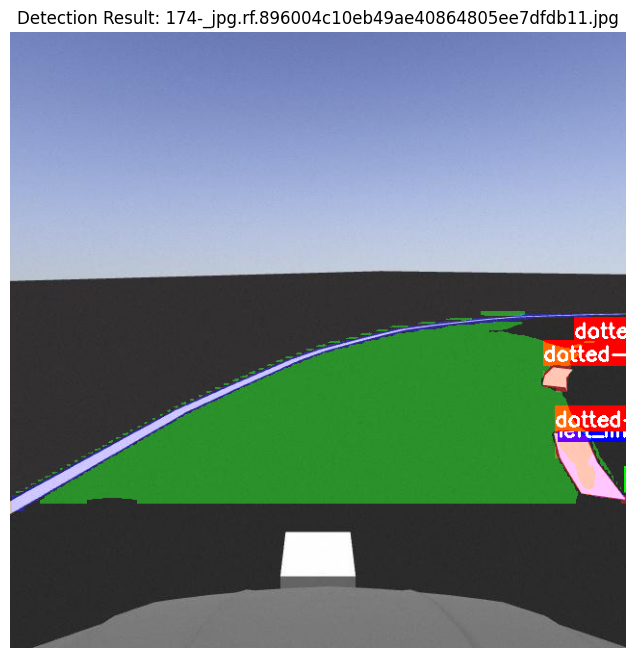

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


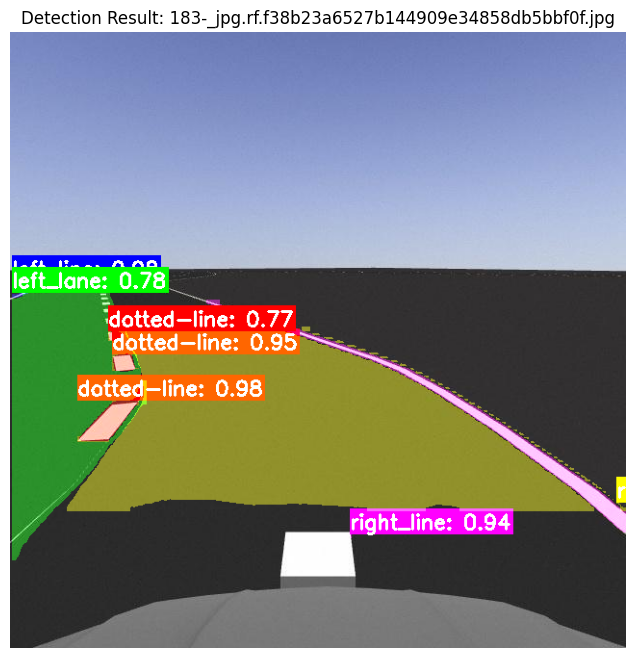

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


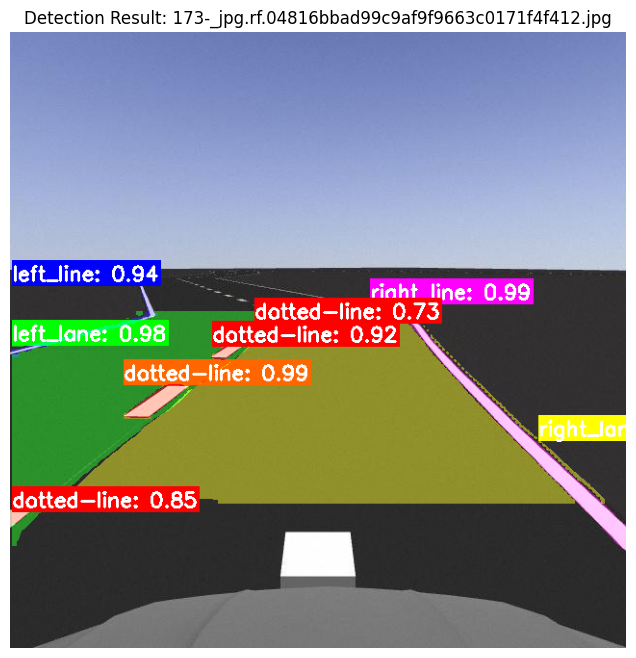

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


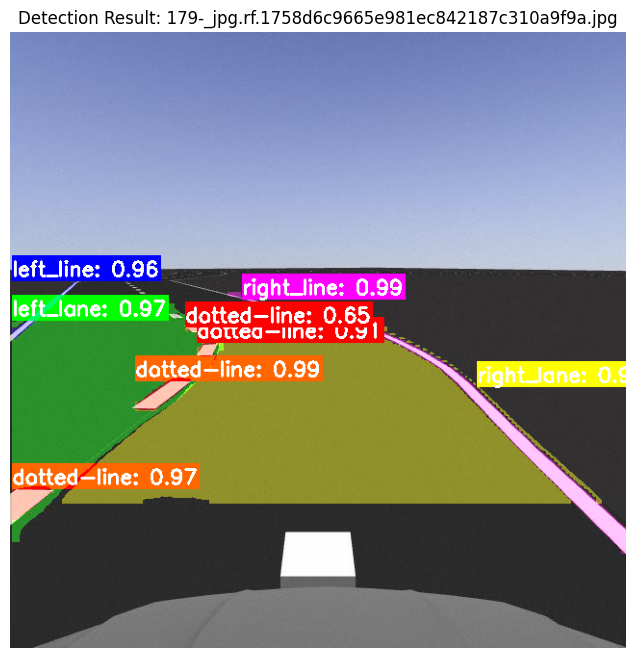

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


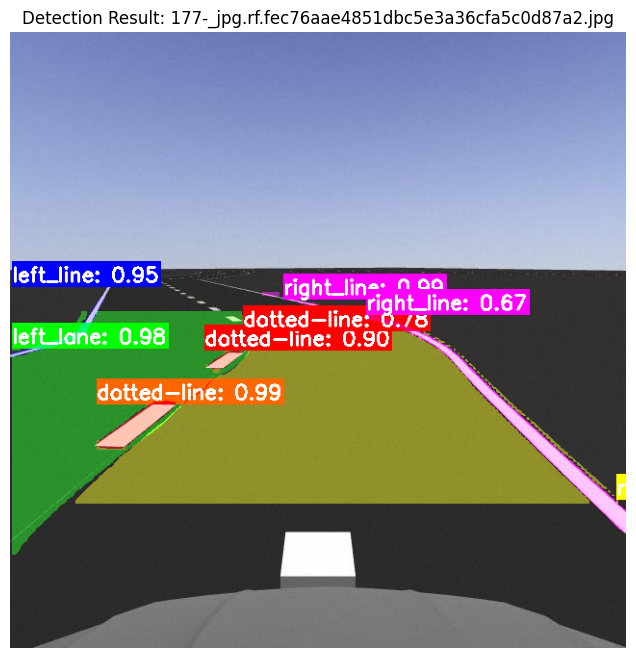

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


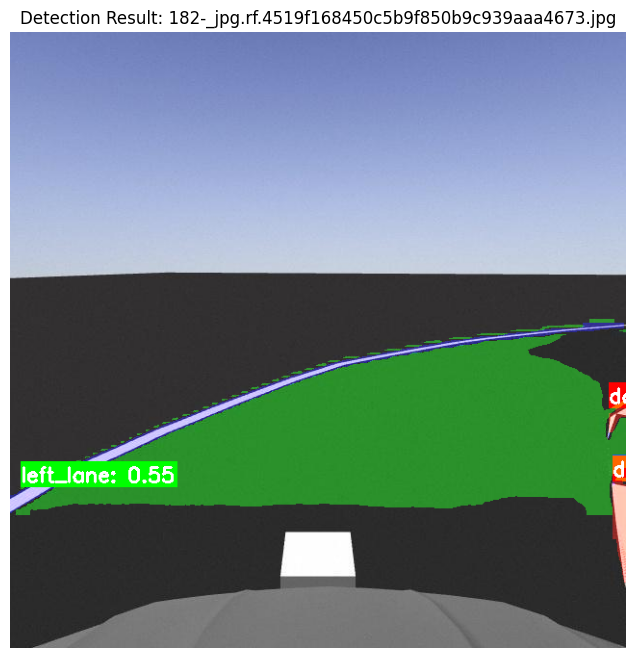

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


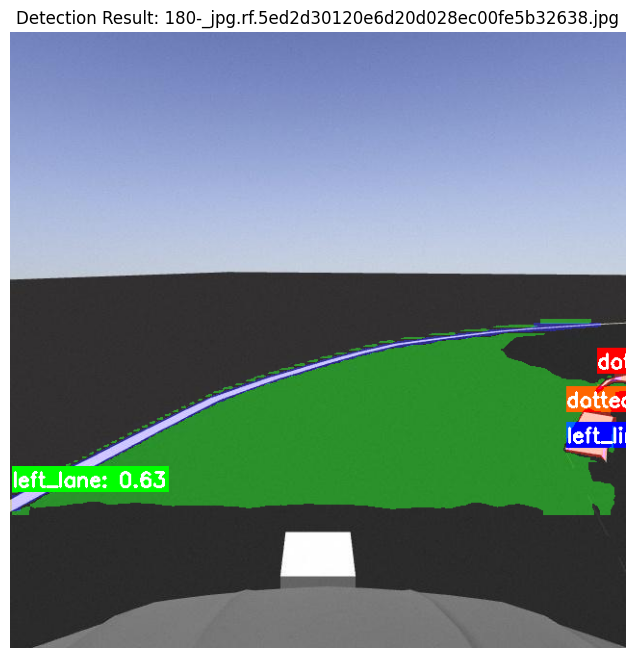

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


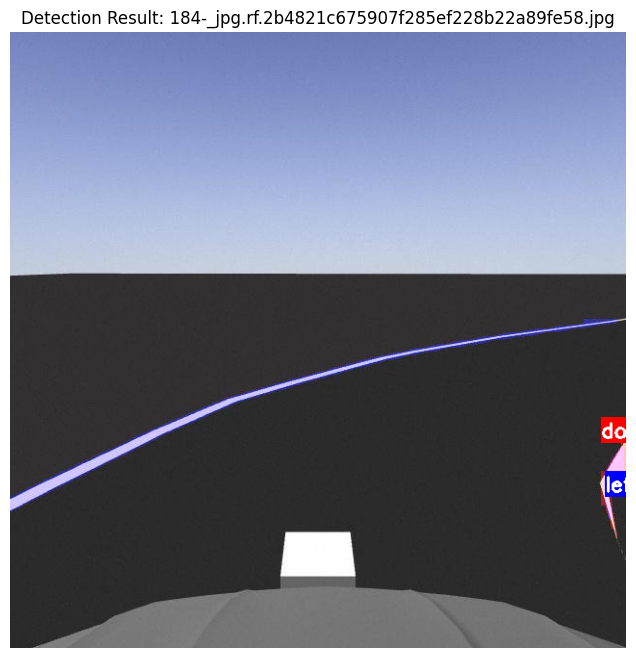

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


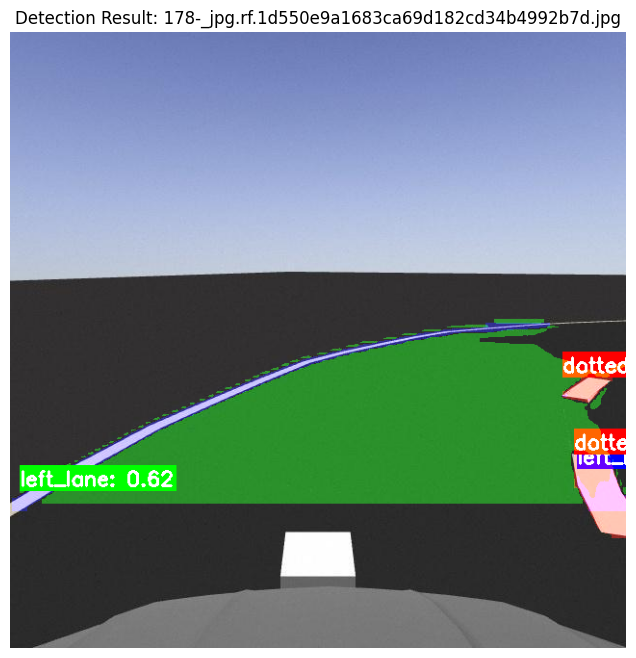

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


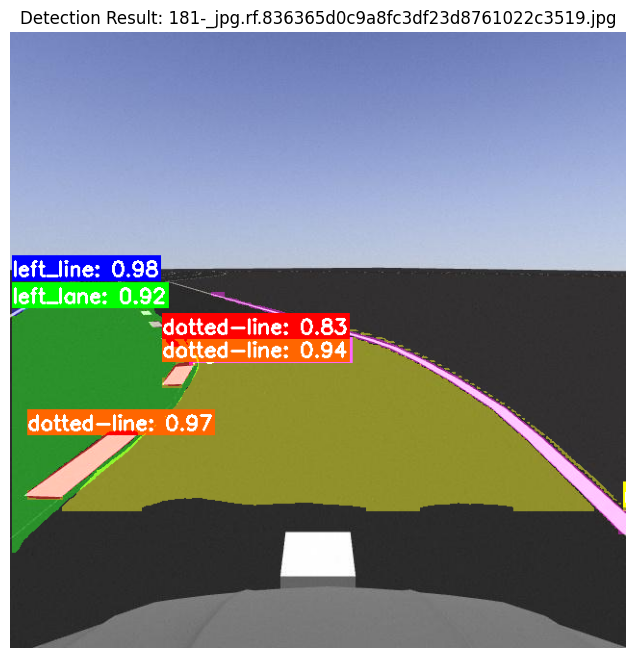

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


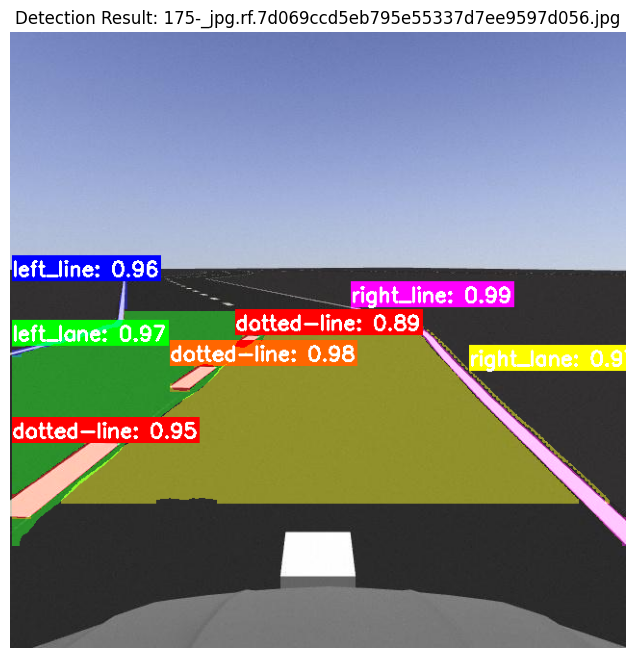

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


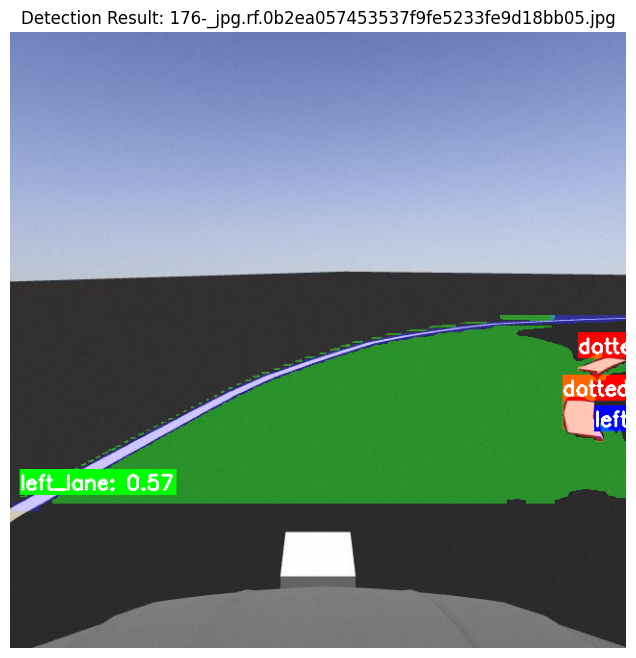

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


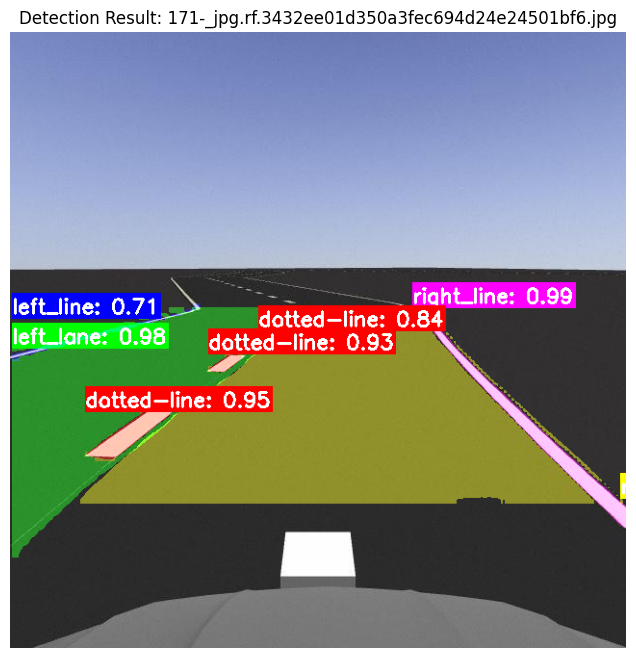

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


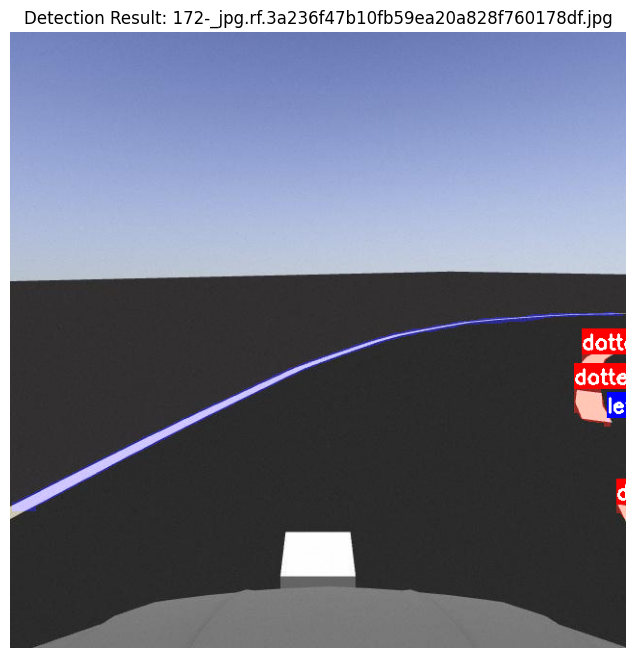

Results saved to /content/runs/detect/test_results5
15 labels saved to /content/runs/detect/test_results5/labels


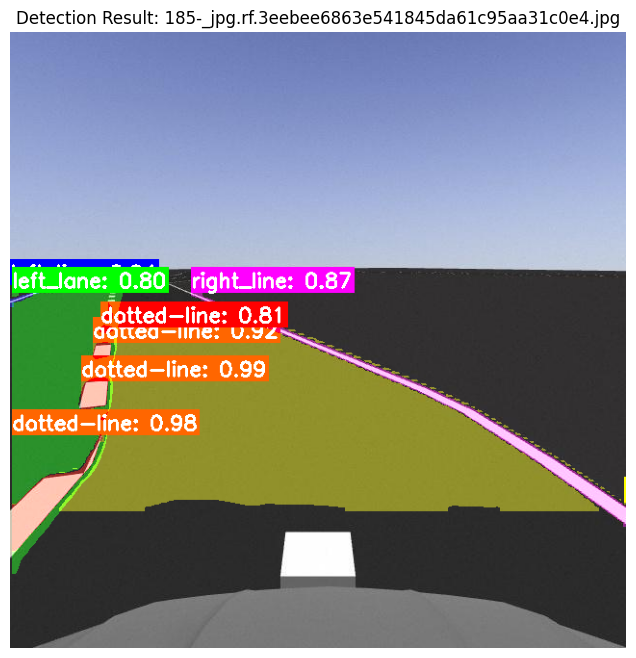

In [36]:
import matplotlib.pyplot as plt
import numpy as np # numpy를 np로 import 합니다.
import os # os 모듈을 임포트합니다.

# 테스트 이미지 디렉토리의 파일 목록을 가져옵니다.
test_images_dir = '/content/dataset/test/images/'
test_images = os.listdir(test_images_dir)
# 파일 이름만 가져오므로, 전체 경로를 사용할 때는 디렉토리 경로를 다시 붙여야 합니다.

for i, img_name in enumerate(test_images[:15]):  # 15개
    img_path = os.path.join(test_images_dir, img_name) # 이미지 파일의 전체 경로를 생성합니다.

    # 예측 실행
    result = model.predict(img_path, conf=0.5, verbose=False)

    # 향상된 시각화
    enhanced_img = draw_enhanced_results(img_path, result)

    # 결과 표시
    plt.figure(figsize=(12, 8))
    plt.imshow(enhanced_img)
    plt.title(f'Detection Result: {img_name}')
    plt.axis('off')
    plt.show()

In [ ]:
import shutil
from google.colab import files

# 1. zip 파일로 압축 (기존 zip 파일이 있다면 덮어씌움)
shutil.make_archive('/content/runs_backup', 'zip', '/content/runs')

# 2. 다운로드 링크 제공
files.download('/content/runs_backup.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#동영상으로 만들기

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# YOLO 예측 + 시각화 함수 (콜라보용)
image_dir = '/content/dataset/test/images/'
test_images = sorted([img for img in os.listdir(image_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])

frames = []

for i, img_name in enumerate(test_images[:5]):  # 처음 5개만
    img_path = os.path.join(image_dir, img_name)

    # 예측 실행
    result = model.predict(img_path, conf=0.5, verbose=False)

    # 향상된 시각화
    enhanced_img = draw_enhanced_results(img_path, result)

    # RGB -> BGR (OpenCV용)
    bgr_img = cv2.cvtColor(np.array(enhanced_img), cv2.COLOR_RGB2BGR)

    # 모든 프레임 사이즈를 동일하게 유지
    bgr_img = cv2.resize(bgr_img, (1280, 720))

    frames.append(bgr_img)

# 🔄 동영상 생성
video_path = "/content/detection_results.mp4"
fps = 2  # 0.5초 간격 = 2프레임/초
height, width, _ = frames[0].shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 코덱 설정

out = cv2.VideoWriter(video_path, fourcc, fps, (width, height))

for frame in frames:
    out.write(frame)

out.release()
print(f"✅ 영상 저장 완료: {video_path}")

# Colab에서 다운로드 링크 제공
from google.colab import files
files.download(video_path)


Results saved to /content/runs/detect/test_results4
15 labels saved to /content/runs/detect/test_results4/labels
Results saved to /content/runs/detect/test_results4
15 labels saved to /content/runs/detect/test_results4/labels
Results saved to /content/runs/detect/test_results4
15 labels saved to /content/runs/detect/test_results4/labels
Results saved to /content/runs/detect/test_results4
15 labels saved to /content/runs/detect/test_results4/labels
Results saved to /content/runs/detect/test_results4
15 labels saved to /content/runs/detect/test_results4/labels
✅ 영상 저장 완료: /content/detection_results.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>